# Task 1 - Install and import all necessary libraries in your Jupyter notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # To import the k-means algorithm from scikit-learn.
import pylab as pl                 # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Graphs created are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# Task 2 - Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

In [3]:
# Assigning local folder path of dataset to a variable

path=r'C:\Users\LENOVO\Desktop\CF - Data Analytics\Achievement 7\Achievement 7 - PYTHON'

In [4]:
# Importing dataset - Country Vaccinations

df_vacc_country=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'country_vaccinations_cleaned.csv'), index_col=False)

In [5]:
df_vacc_country.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,0,Afghanistan,AFG,22/02/2021,0.00,0.00,3041823.96,112209.42,0.00,11.26,3376.55,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,1,Afghanistan,AFG,23/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,2,Afghanistan,AFG,24/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,3,Afghanistan,AFG,25/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,4,Afghanistan,AFG,26/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


In [6]:
df_vacc_country.columns

Index(['Unnamed: 0', 'country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'vaccines'],
      dtype='object')

In [7]:
# Renaming long columns names into a shorter one

df_vacc_country_1 = df_vacc_country.rename(columns = {'total_vaccinations' : 'total_vaccs', 'people_vaccinated' : 'ppl_vaccd', 'daily_vaccinations' : 'daily_vaccs', 'people_fully_vaccinated' : 'ppl_fully_vaccd', 'total_vaccinations_per_hundred' : 'total_vaccs_per_100', 'people_fully_vaccinated_per_hundred' : 'ppl_fully_vaccd_per_100', 'daily_vaccinations_per_million' : 'daily_vaccs_per_million'})

In [8]:
df_vacc_country_1.head()

,Unnamed: 0,country,iso_code,date,total_vaccs,ppl_vaccd,ppl_fully_vaccd,daily_vaccs,total_vaccs_per_100,ppl_fully_vaccd_per_100,daily_vaccs_per_million,vaccines
0,0,Afghanistan,AFG,22/02/2021,0.00,0.00,3041823.96,112209.42,0.00,11.26,3376.55,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,1,Afghanistan,AFG,23/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,2,Afghanistan,AFG,24/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,3,Afghanistan,AFG,25/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,4,Afghanistan,AFG,26/02/2021,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


### Missing Values Check

In [9]:
# Check for missing values

df_vacc_country_1.isnull().sum()

# No missing values to handle

Unnamed: 0                 0
country                    0
iso_code                   0
date                       0
total_vaccs                0
ppl_vaccd                  0
ppl_fully_vaccd            0
daily_vaccs                0
total_vaccs_per_100        0
ppl_fully_vaccd_per_100    0
daily_vaccs_per_million    0
vaccines                   0
dtype: int64

### Duplicates Check

In [13]:
df_vacc_country_1.shape

(29412, 12)

In [10]:
dups = df_vacc_country_1.duplicated()

In [11]:
dups.shape  

# NO DUPLICATES found

(29412,)

### Dropping categorical columns

In [12]:
df_vacc_country_2 = df_vacc_country_1.drop(columns=['country'])

In [13]:
df_vacc_country_3 = df_vacc_country_2.drop(columns=['iso_code'])

In [14]:
df_vacc_country_4 = df_vacc_country_3.drop(columns=['date'])

In [15]:
df_vacc_country_5 = df_vacc_country_4.drop(columns=['vaccines'])

In [16]:
df_vacc_country_6 = df_vacc_country_5.drop(columns=['Unnamed: 0'])

In [17]:
df_vacc_country_6.head()

,total_vaccs,ppl_vaccd,ppl_fully_vaccd,daily_vaccs,total_vaccs_per_100,ppl_fully_vaccd_per_100,daily_vaccs_per_million
0,0.00,0.00,3041823.96,112209.42,0.00,11.26,3376.55
1,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00
2,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00
3,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00
4,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00


# Task 3 - Elbow Technique

In [18]:
num_cl = range(1, 10) 
# Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters=i) for i in num_cl] 
# Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df_vacc_country_6).score(df_vacc_country_6) for i in range(len(kmeans))] 
# Creates a score that represents a rate of variation for the given cluster option.

score

[-6.59746678609608e+19,
 -2.671523906606642e+19,
 -9.797980069669202e+18,
 -6.971647657887863e+18,
 -5.121443525412522e+18,
 -4.01660584137382e+18,
 -3.2033140073034317e+18,
 -2.765365597069435e+18,
 -2.3374535116479846e+18]

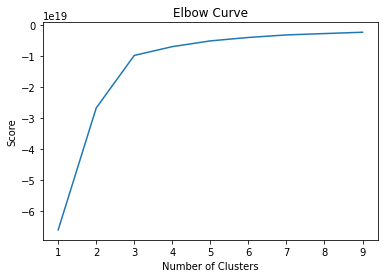

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Task 4 - Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

#### There is a jump from 2 to 3 on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is 3.

# Task 5 - Run the k-means algorithm

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [22]:
# Fit the k-means object to the data.

kmeans.fit(df_vacc_country_6)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

# Task 6 - Attach a new column to your dataframe with the resulting clusters

In [23]:
df_vacc_country_6['clusters'] = kmeans.fit_predict(df_vacc_country_6)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [24]:
df_vacc_country_6.head()

,total_vaccs,ppl_vaccd,ppl_fully_vaccd,daily_vaccs,total_vaccs_per_100,ppl_fully_vaccd_per_100,daily_vaccs_per_million,clusters
0,0.00,0.00,3041823.96,112209.42,0.00,11.26,3376.55,0
1,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,0
2,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,0
3,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,0
4,1094522.96,5341596.08,3041823.96,1367.00,27.29,11.26,35.00,0


In [25]:
df_vacc_country_6['clusters'].value_counts()

0    29139
2      233
1       40
Name: clusters, dtype: int64

In [26]:
df_vacc_country_6.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'country_vaccs_clusters.csv'))

# Task 7 - Create a few different visualizations (e.g., scatterplots) using your clustered data.

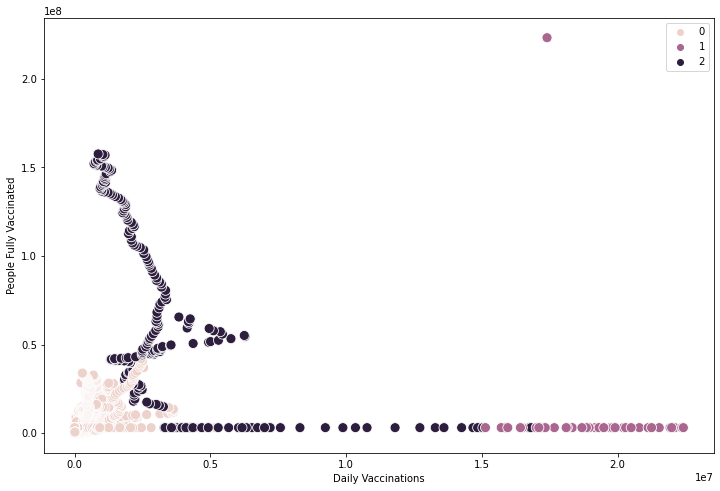

In [33]:
# Plot the clusters for the "ppl_fully_vaccd" and "daily_vaccs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_vacc_country_6['daily_vaccs'], y=df_vacc_country_6['ppl_fully_vaccd'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Daily Vaccinations') # Label x-axis.
plt.ylabel('People Fully Vaccinated') # Label y-axis.
plt.show()

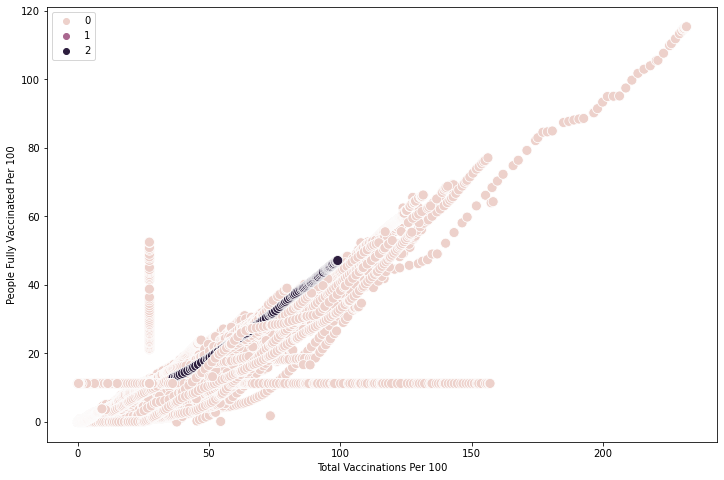

In [34]:
# Plot the clusters for the "ppl_fully_vaccd_per_100" and "total_vaccs_per_100" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_vacc_country_6['total_vaccs_per_100'], y=df_vacc_country_6['ppl_fully_vaccd_per_100'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Vaccinations Per 100') # Label x-axis.
plt.ylabel('People Fully Vaccinated Per 100') # Label y-axis.
plt.show()

# Task 8 - Discuss how and why the clusters make sense.

### For the 1st graph - 'Daily Vaccinations' vs 'People Fully Vaccinated', three different groups of clusters can be seen.

### The 1st cluster of data points is denoted by light purple (0 in legend) and they represent the countries that have slight increased the number of daily vaccinations, but have only seen a small rise in the number of people being fully vaccinated.

### The 2nd cluster of data points is denoted by medium purple (1 in legend) and they represent the countries that have significantly increased their daily number of vaccinations, but have only seen a small rise in the number of people being fully vaccinated.

### The 3rd cluster of data points is denoted by dark purple (2 in legend) and they represent the countries that have increased their number of daily vaccinations and have seen a significant rise in the number of people being fully vaccinated.

### The 3rd cluster of data points also represent a group of countries that have increased their number of daily vaccinations but only to see a small rise in the number of people being fully vaccinated. This does not make sense here as this group should be part of the 2nd cluster denoted by medium purple (1 in legend).

### For the 2nd graph - 'Total Vaccinations per 100' vs 'People Fully Vaccinated per 100', two different groups of clusters can be seen.

### The 1st cluster of data points (denoted by 0 - light purple) represents the countries that have significanlty increased their number of total vaccinations per 100 and this has resulted in a large increase in the number of people being fully vaccinated.

### Another observation from this cluster that does not make sense is that it also shows a few countries that have not seen an increase in the number of people being fully vaccinated despite the significant increase in the number of total vaccinations per 100

### The 2nd cluster of data points (denoted by 2 - dark purple) represents only the countries that have increased the number of total vaccinations per 100 and these countries have seen a significant rise in the number of people being fully vaccinated per 100

# Task 9 - Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [35]:
df_vacc_country_6.loc[df_vacc_country_6['clusters'] == 2, 'cluster'] = 'dark purple'
df_vacc_country_6.loc[df_vacc_country_6['clusters'] == 1, 'cluster'] = 'purple'
df_vacc_country_6.loc[df_vacc_country_6['clusters'] == 0, 'cluster'] = 'pink'

In [36]:
df_vacc_country_6.groupby('cluster').agg({'ppl_fully_vaccd':['mean', 'median'], 
                         'daily_vaccs':['mean', 'median'], 
                         'total_vaccs_per_100':['mean', 'median'],
                          'ppl_fully_vaccd_per_100':['mean', 'median']})

ppl_fully_vaccd                daily_vaccs              \
                       mean       median          mean      median   
cluster                                                              
dark purple    6.486076e+07  49745316.00  3.542003e+06   2656575.0   
pink           2.539951e+06   3041823.96  5.882161e+04      6335.0   
purple         8.548253e+06   3041823.96  1.902535e+07  19062928.5   

            total_vaccs_per_100         ppl_fully_vaccd_per_100         
                           mean  median                    mean median  
cluster                                                                 
dark purple           44.070000  30.270               18.335751  11.26  
pink                  27.103192  27.290               11.204501  11.26  
purple                67.579000  66.415               11.366250  11.26

# Task 10 - Propose what these results could be useful for in future steps of an analytics pipeline

#### not sure what to answer .. please guide